# Multiple Linear Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Restaurant_revenue.csv')
x=np.array(x)
dataset.head(10)

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
5,92,19.427670,13.114473,American,43.099950,1,10,399.867507
6,96,35.350343,16.960318,American,20.181622,0,86,496.653687
7,84,46.314645,14.486349,Italian,28.921100,1,1,417.158607
8,84,22.647863,15.841873,American,11.732611,0,26,352.148065
9,97,33.532267,8.095969,Italian,37.973579,0,98,272.793517


#Separating Input and Output data

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)

[[61 43.11763548709968 12.66379252026928 ... 36.23613252393598 0 45]
 [24 40.02007699061254 4.577892096932272 ... 17.95256243749612 0 36]
 [81 41.98148523678063 4.65291077125362 ... 22.600420287336984 1 91]
 ...
 [69 17.110655514049927 4.141898363531425 ... 44.64931481070681 0 55]
 [73 37.66472222277277 3.046555713253576 ... 27.76735791686017 0 23]
 [81 34.72206697148744 17.989104250922033 ... 15.482112113126218 1 72]]


## Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 0.0 1.0 ... 36.23613252393598 0 45]
 [0.0 1.0 0.0 ... 17.95256243749612 0 36]
 [0.0 0.0 1.0 ... 22.600420287336984 1 91]
 ...
 [0.0 0.0 1.0 ... 44.64931481070681 0 55]
 [0.0 0.0 1.0 ... 27.76735791686017 0 23]
 [0.0 1.0 0.0 ... 15.482112113126218 1 72]]


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[126.17 139.18]
 [414.38 429.95]
 [326.64 288.53]
 [378.76 256.69]
 [421.17 423.69]
 [363.08 389.54]
 [308.77 273.37]
 [310.46 328.66]
 [345.99 346.27]
 [330.23 353.73]
 [343.07 329.25]
 [120.89 273.87]
 [171.28 268.14]
 [401.01 404.5 ]
 [211.33 194.5 ]
 [424.49 387.03]
 [290.46 308.84]
 [319.63 399.7 ]
 [130.15 117.15]
 [364.61 367.65]
 [382.22 442.85]
 [379.81 220.96]
 [179.48 172.93]
 [272.47 321.77]
 [164.16 140.97]
 [152.95 195.26]
 [288.13 324.82]
 [405.49 412.58]
 [415.15 439.98]
 [177.7  221.32]
 [146.56 146.65]
 [410.92 404.6 ]
 [461.71 492.31]
 [383.18 295.26]
 [372.76 325.07]
 [260.27 343.53]
 [407.67 378.58]
 [265.03 256.91]
 [137.11 177.12]
 [195.5  276.87]
 [322.88 285.47]
 [169.54 110.23]
 [300.18 201.35]
 [263.23 250.53]
 [313.1  268.  ]
 [134.46 205.39]
 [361.48 442.05]
 [314.38 333.82]
 [279.1  291.81]
 [233.1  149.91]
 [181.29 139.52]
 [245.61 269.08]
 [133.3  142.67]
 [275.73 424.01]
 [168.79 124.35]
 [316.29 370.33]
 [123.58  73.05]
 [277.67 283.65]
 [343.79 369.9

Length


In [ ]:
print(f"Shape of x: {x.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")


Shape of x: (10,)
Shape of y_test: (10,)
Shape of y_pred: (10,)


In [ ]:
y_test = y_test[:len(x)]
y_pred = y_pred[:len(x)]

# Plot

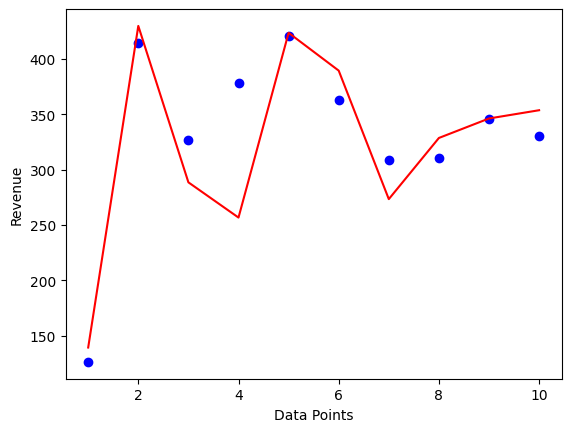

In [ ]:
plt.plot(x, y_test, color = 'red')
plt.scatter(x, y_pred, color = 'blue')
plt.xlabel('Data Points')
plt.ylabel('Revenue')
plt.show()